<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели</a></span><ul class="toc-item"><li><span><a href="#Поделим-на-обучающие-и-тестовые-выборки-непреобразованные-признаки--features-и-целевые-значения-target-для-оценки-модели:" data-toc-modified-id="Поделим-на-обучающие-и-тестовые-выборки-непреобразованные-признаки--features-и-целевые-значения-target-для-оценки-модели:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Поделим на обучающие и тестовые выборки непреобразованные признаки  <code>features</code> и целевые значения <code>target</code> для оценки модели:</a></span></li><li><span><a href="#Поделим-на-обучающие-и-тестовые-выборки-преобразованные-признаки--features_encrypted-и-целевые-значения-target-для-оценки-модели:" data-toc-modified-id="Поделим-на-обучающие-и-тестовые-выборки-преобразованные-признаки--features_encrypted-и-целевые-значения-target-для-оценки-модели:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Поделим на обучающие и тестовые выборки преобразованные признаки  <code>features_encrypted</code> и целевые значения <code>target</code> для оценки модели:</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Цель: защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Качество моделей машинного обучения не должно ухудшиться. Подбирать наилучшую модель не требуется.

План выполнения проекта:
1. Загрузить и изучить данные.
2. Ответить на вопрос и обосновать решение. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии
- Изменится. Приведите примеры матриц.
- Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
display(df.head(10))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
df.duplicated().sum()

153

Приведем типы данных в соответствие для сокращения расходования оперативной памяти:

In [8]:
#check
df.apply (['count', 'min', 'max']).style.format("{:,.2f}")

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
min,0.00,18.00,"5,300.00",0.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [9]:
df['Пол'] = df['Пол'].astype('bool')
df['Возраст'] = df['Возраст'].astype('uint8')
df['Зарплата'] = df['Зарплата'].astype('uint32')
df['Члены семьи'] = df['Члены семьи'].astype('uint8')

In [10]:
#check
df.apply (['count', 'min', 'max']).style.format("{:,.2f}")

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
min,0.00,18.00,"5,300.00",0.00,0.00
max,1.00,65.00,"79,000.00",6.00,5.00


In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Пол                5000 non-null   bool  
 1   Возраст            5000 non-null   uint8 
 2   Зарплата           5000 non-null   uint32
 3   Члены семьи        5000 non-null   uint8 
 4   Страховые выплаты  5000 non-null   int64 
dtypes: bool(1), int64(1), uint32(1), uint8(2)
memory usage: 73.4 KB


Подготовим датасет для работы с машинными моделями: выделим признаки и цели, отмасштабируем численные признаки

In [12]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [13]:
display(features)

,Пол,Возраст,Зарплата,Члены семьи
0,True,41,49600,1
1,False,46,38000,1
2,False,29,21000,0
3,False,21,41700,2
4,True,28,26100,0
...,...,...,...,...
4995,False,28,35700,2
4996,False,34,52400,1
4997,False,20,33900,2
4998,True,22,32700,3


In [14]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


<AxesSubplot:>

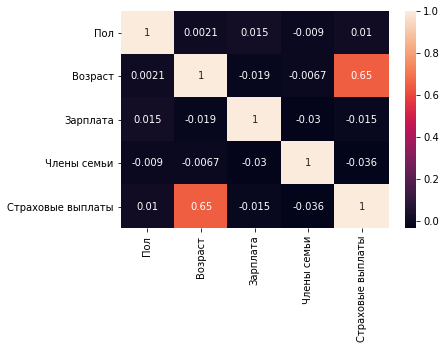

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.00,0.00,0.00,0.0,0.03
Возраст,0.00,1.00,0.07,0.0,0.88
Зарплата,0.00,0.07,1.00,0.0,0.00
Члены семьи,0.00,0.00,0.00,1.0,0.00
Страховые выплаты,0.03,0.88,0.00,0.0,1.00


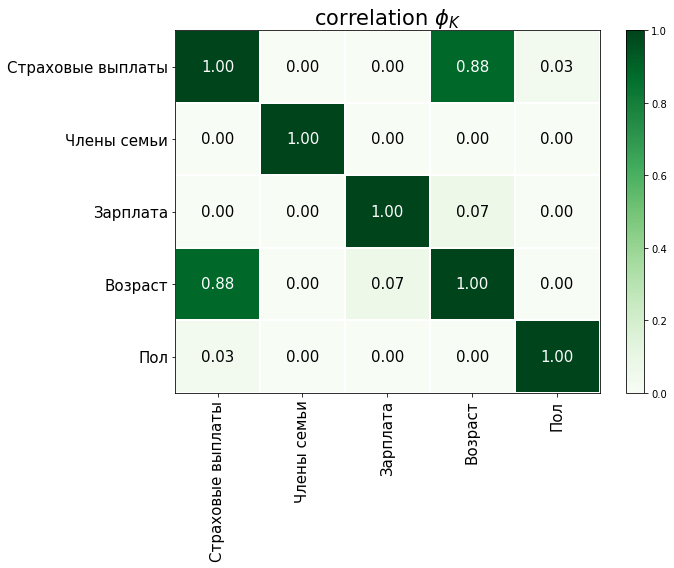

In [17]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

interval columns not set, guessing: ['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']


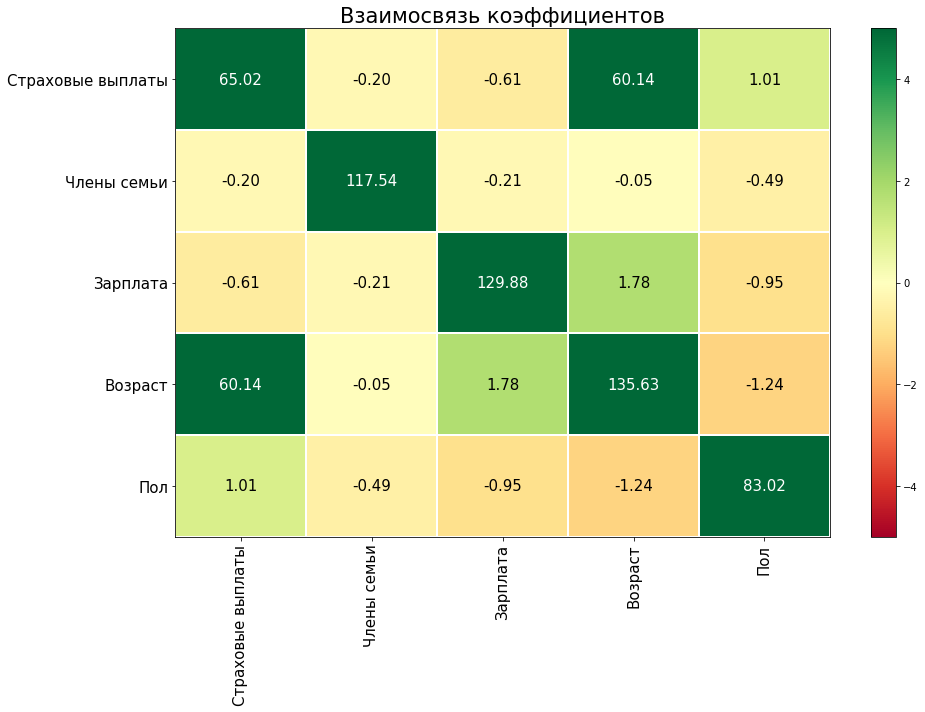

In [18]:
significance_overview = df.significance_matrix()
plot_correlation_matrix(significance_overview.values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Взаимосвязь коэффициентов", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

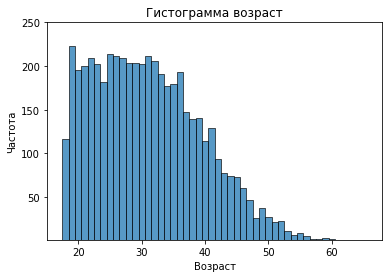

In [19]:
fig, ax = plt.subplots()
ax.figsize=(15,5)
ax.set_ylim( 1 , 250 )
ax.set_ylabel( "Частота" )
ax.set_title( "Гистограмма возраст" )
sns.histplot(df['Возраст'], bins=25, discrete=True, ax=ax);


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


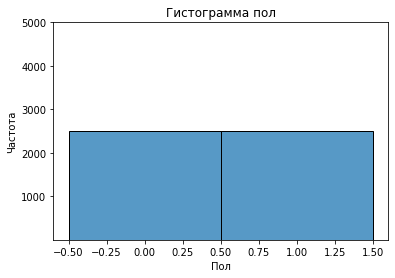

In [20]:
fig, ax = plt.subplots()
ax.figsize=(15,5)
ax.set_ylim( 1 , 5000 )
ax.set_ylabel( "Частота" )
ax.set_title( "Гистограмма пол" )
sns.histplot(df['Пол'], bins=3, discrete=True, ax=ax);

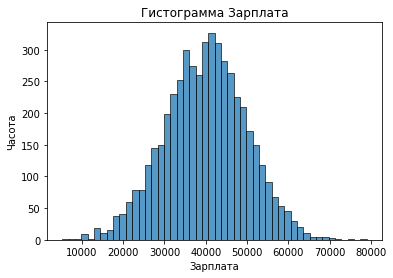

In [21]:
fig, ax = plt.subplots()
ax.figsize=(15,5)
ax.set_ylabel( "Часота" )
ax.set_title( "Гистограмма Зарплата" )
sns.histplot(df['Зарплата'], ax=ax);

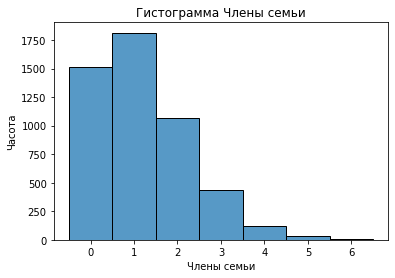

In [22]:
fig, ax = plt.subplots()
ax.figsize=(15,5)
ax.set_ylabel( "Часота" )
ax.set_title( "Гистограмма Члены семьи" )
sns.histplot(df['Члены семьи'], discrete=True, ax=ax);

**Выводы:**
1. Датасет имеет размерность 5000 * 5. Данные подготовлены. Один из признаков - пол  - категориальный, остальные - численные. Целевой признак `Страховые выплаты` - категориальный. ПОсле изменения данных уровень расхода оперативной памяти сокращен в 3 раза - до 63 Кб.
2. Среднестатистический пользователь сервиса страхования имеет возраст 31 год, заработнрую плату 40000 рублей, имеет одного члена семьи и не обращается за страховкой, равновероятно может быть как мужчиной так и женщиной
3. Признаки возраст/члены семьи и зарплата имеют разный порядок. Выполнено масштабирование данных для работы с моделью линейной регрессии
4. Уникального идентификатора нет, поэтому полные дубликаты не удаляем - всего их 153.
5. Ключевое влияние на факт страховой выплаты оказывает возраст. Это подтверждается и коэффициентом корреляции Пирсона и Phik.

## Умножение матриц

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
a. Изменится. Приведите примеры матриц.
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится от умножения матрицы признаков на обратимую матрицу P.

**Обоснование:** 
1. Представим новую матрицу `K` ввиде произведения матрицы `X` и обратимой матрицы `O`:

$$
K = XO
$$

2. Тогда для матрицы `K` формула обучения вычисляется по формуле:

$$
w_1 = (K^T K)^{-1} K^T y
$$

3. Тогда для матрицы `K` предсказания вычисляются по формуле:

$$
a_1 = Kw_1 = K(K^T K)^{-1} K^T y
$$
4. Заменим матрицу `K` на ее составляющие из формулы п.1, раскроем скобки в 2 этапа: 

$$
a_1 = (XO)((XO)^T (XO))^{-1} (XO)^T y = X\color{blue}{O} (\color{red}{O}^TX^TX\color{red}{O})^{-1} \color{blue}{O^T} X^T y =  
$$

5. O для нас неизвестная матрица. Воспользуемся правилом $A(A)^{-1} = E$ для сокращения матриц `O` до единичных: 

$$
a_1 = X E(E X^TX)^{-1} X^T y= X(X^T X)^{-1} X^T y = a
$$
6. Таким образом, формула предсказаний для матрицы признаков K равна формуле предсказаний `a` первоначальной матрицы

## Алгоритм преобразования

**Алгоритм**

Создадим отдельный класс для работы с шифровкой и дешифровкой матрицы признаков.

In [23]:
class Crypto:
    np.random.seed(282)
    def __init__(self,features):
        self.features = features
        self.p = None
        self.matrix_encrypted= None
        
    def encrypt(self):
        self.p = np.random.normal(3, 2.5, size=(self.features.shape[1] , self.features.shape[1]))
        self.matrix_encrypted = self.features @ self.p
        try:
            inv = np.linalg.inv(self.p)
            np.random.seed(0)       
            return self.matrix_encrypted
        except:
            return self.encrypt(self) 
    
    def decrypt(self):
        return self.matrix_encrypted @ np.linalg.inv(self.p)

**Обоснование**
1. Рандомно генерируем обратимую матрицу размерности n * n, где n - количество признаков выборки.
Размерность матрицы выбираем n на n выбираем потому, что обратимая матрицы существует только для квадратных невырожденных матриц. Отдельно на обратимость не производим, т.к. матрица формируется через np.random.normal. Эта функция формирует матрицу из рандомных значений нормального распределения, а такая матрица будет обратимой (=невырожденной).
2. Шифруем признаки: для этого производим матричное умножение признаков на обратимую матрицу.
3. Возвращаем результат работы функции: зашифрованную матрицу признаков + саму матрицу-шифратор `p`. `p` возвращаем для того, чтобы у владельца датасета была возможность в дальнейшем дешфировать данные, а также для проверки правильности работы функции.

## Проверка алгоритма

In [24]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,True,41,49600,1,0
1,False,46,38000,1,1
2,False,29,21000,0,0
3,False,21,41700,2,0
4,True,28,26100,0,0


In [25]:
a = Crypto(features)
a.encrypt()

,0,1,2,3
0,305746.435945,173151.209919,411723.214464,35071.764728
1,234240.870974,132708.248716,315498.029929,26870.408921
2,129447.746233,73352.216572,174369.144571,14848.011737
3,257051.988288,145524.222944,346086.203788,29487.211685
4,160885.292269,91136.851634,216681.633003,18454.572159
...,...,...,...,...
4995,220065.905595,124620.553091,296335.602538,25246.121535
4996,323007.151544,182894.046755,434921.188685,37049.401765
4997,208970.749689,118313.701517,281364.728593,23973.002308
4998,201574.860161,114132.675584,271421.616026,23129.162996


In [26]:
a.p

array([[-0.29642497, -1.00565501,  2.08299674,  1.24554681],
       [-0.06622792,  3.53966518,  4.5241158 ,  0.07843382],
       [ 6.16426985,  3.48807458,  8.29704501,  0.70693986],
       [ 1.66317236, -1.41010648,  2.21021696,  3.08611117]])

In [27]:
a.matrix_encrypted.head()

,0,1,2,3
0,305746.435945,173151.209919,411723.214464,35071.764728
1,234240.870974,132708.248716,315498.029929,26870.408921
2,129447.746233,73352.216572,174369.144571,14848.011737
3,257051.988288,145524.222944,346086.203788,29487.211685
4,160885.292269,91136.851634,216681.633003,18454.572159


In [28]:
a.decrypt().head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


### Проверка модели

#### Поделим на обучающие и тестовые выборки непреобразованные признаки  `features` и целевые значения `target` для оценки модели:

In [29]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=282)

#### Поделим на обучающие и тестовые выборки преобразованные признаки  `features_encrypted` и целевые значения `target` для оценки модели:

In [31]:
features_train, features_test, target_train, target_test = train_test_split(
    a.matrix_encrypted, target, test_size=0.25, random_state=282)

In [32]:
lr_2 = LinearRegression()
lr_2.fit(features_train, target_train)
pred_lr_2 = lr_2.predict(features_test)
lr_2_r2 = r2_score(target_test, pred_lr_2)
print('R2 на зашифрованных данных:', lr_2_r2)

R2 на зашифрованных данных: 0.4173141911041054


Вывод: 
1. Выполнен обзор датасета
2. Подготовлена функция шифрования исходной матрицы, осуществляющая проверку обратимости шифрующей матрицы. При успешной генерации обратимой матрицы функция возвращает зашифрованную матрицу исходных признаков + матрицу-дешифратор.
3. Восстановить исходные значения матрицы признаков, зашифрованной путем умножения на обратимую матрицу, возможно. После умножения таких признаков на обратную матрицу значения становятся исходными.
4. Умножение матрицы показателей на обратимую матрицу действительно не влияет на метрику r2 качества линейной регрессии. показатели r2 практчески полностью равные. Микро-разница показателей обусловлена преобразованием значений и их округлением в алгоритмах numpy.